# Import libraries

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np


# Load audio files

In [3]:
filename = "../audio/095_Coffee_House_10s.wav"
#filename = "../audio/Beethoven_Sonata_Pathetique.wav"


# 22050Hz is the default sampling rate: resamples the input to 22050Hz
# Mono is the default number or channel: mix stereo to mono 

y, sr = librosa.load(filename) 
#y, sr = librosa.load(filename, sr=None) # use the native sampling rate
#y, sr = librosa.load(filename, sr=None, mono=False) # use the native sampling rate and native channels

print(y.shape)
print(sr)


(221556,)
22050


# Play audio files

In [4]:
ipd.Audio(y, rate=sr) 

# Display waveforms

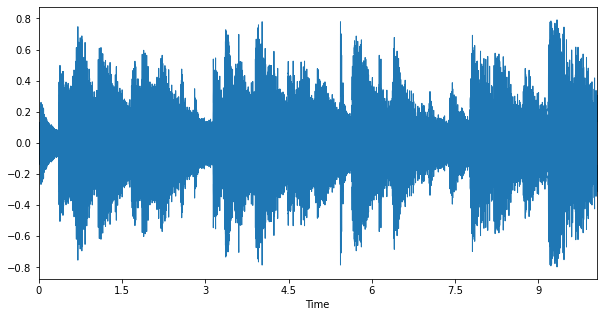

In [6]:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(y, sr=sr)

#librosa.display.waveplot(y[:sr*9], sr=sr)
#librosa.display.waveplot(y[sr*9:sr*18], sr=sr, color='r', alpha=0.6)



# Compute spectrogram

In [9]:
hop_length = 512
n_fft = 2048
#Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
Y = librosa.stft(y, window='hann', n_fft=n_fft, hop_length=hop_length)

# magnitude compression: linear to dB
D = librosa.amplitude_to_db(np.abs(Y), ref=np.max)

# Display Spectrogram

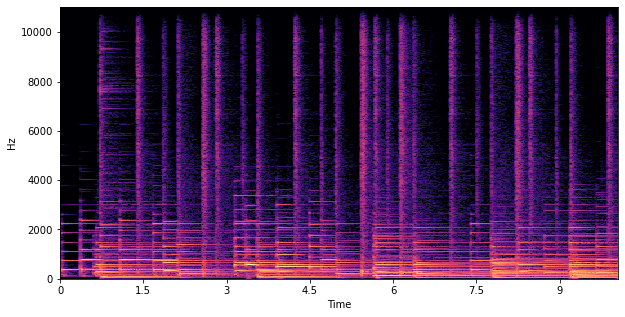

In [10]:
plt.figure(figsize=(10, 5))

img = librosa.display.specshow(D, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency spectrogram')




# Spectrogram with different window lengths

Text(0.5, 1.0, 'Linear-frequency spectrogram (short window)')

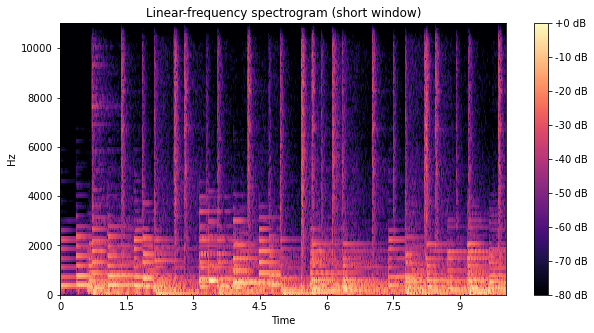

In [13]:
# short window
hop_length = 128
n_fft = 256

Y1 = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D1 = librosa.amplitude_to_db(np.abs(Y1), ref=np.max)

plt.figure(figsize=(10, 5))

img = librosa.display.specshow(D1, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram (short window)')

Text(0.5, 1.0, 'Linear-frequency spectrogram (long window)')

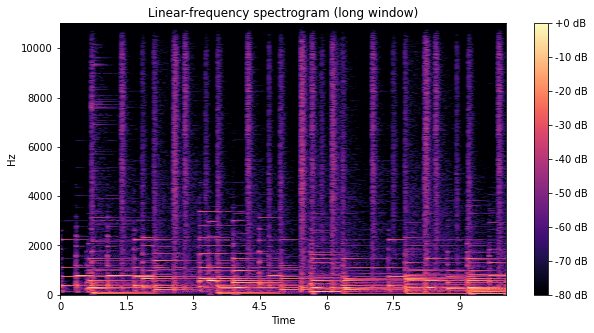

In [14]:
# long window
hop_length = 128
n_fft = 4096

Y2 = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D2 = librosa.amplitude_to_db(np.abs(Y2), ref=np.max)


plt.figure(figsize=(10, 5))

img = librosa.display.specshow(D2, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram (long window)')

# Display a part of the waveform

Text(0.5, 0, 'time in samples')

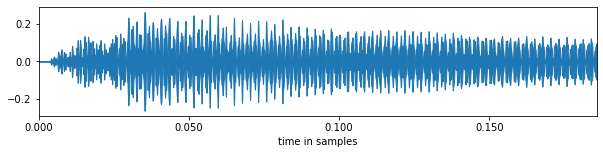

In [15]:
hop_length = 512
n_fft = 2048

wav_start = 1
wav_length = 4096

y1 = y[wav_start:wav_start+wav_length]

plt.figure(figsize=(10, 2))
librosa.display.waveplot(y1, sr=sr)
plt.xlabel('time in samples')

# Display Mel-Spectrogram

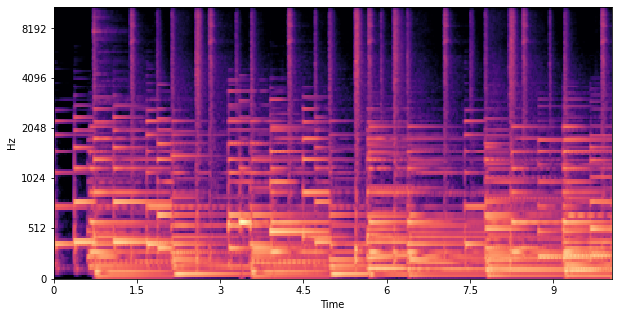

In [17]:
hop_length = 512
n_fft = 2048

D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))**2   # Power spectrum is the default  
S = librosa.feature.melspectrogram(S=D, sr=sr) # 128 mel bins is the default
#S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=64) # 128 mel bins is the default

#S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128) # it is possible to compute mel-spec directly from the waveform


plt.figure(figsize=(10, 5))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Mel-frequency spectrogram')


# Music Scale Example

In [20]:
filename = "../audio/piano_88keys_short_vel96_part2.wav"
#filename = "../audio/Beethoven_Sonata_Pathetique.wav"

y2, sr = librosa.load(filename)   
print(y2.shape)
print (sr)

ipd.Audio(y2, rate=sr) 


(1278900,)
22050


# Music Scale:  Spectrogram

Text(0.5, 1.0, 'Linear-frequency spectrogram')

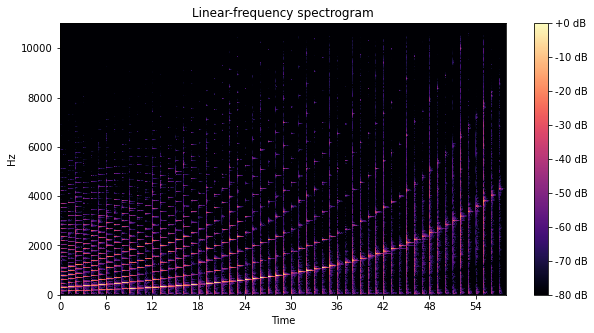

In [21]:
hop_length = 512
n_fft = 2048

Y2 = librosa.stft(y2, n_fft=n_fft, hop_length=hop_length)
D2 = librosa.amplitude_to_db(np.abs(Y2), ref=np.max)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D2, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')



# Music Scale: Constant-Q transform 

(336, 2498)


Text(0.5, 1.0, 'Constant-Q transform')

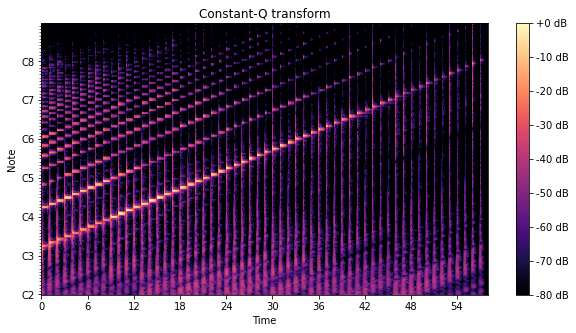

In [22]:
#CQT2 = np.abs(librosa.cqt(y2, sr=sr, fmin=librosa.note_to_hz('C2')))

# default
#bins_per_octave= 12
#n_bins = 84


# higher freq. resolution
bins_per_octave= 12*4
n_bins = 84*4


CQT2 = np.abs(librosa.cqt(y2, sr=sr, fmin=librosa.note_to_hz('C2'), bins_per_octave=bins_per_octave, n_bins=n_bins))
print(CQT2.shape)

plt.figure(figsize=(10, 5))
img = librosa.display.specshow(librosa.amplitude_to_db(CQT2, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', 
                               fmin=librosa.note_to_hz('C2'), 
                               fmax=librosa.note_to_hz('C8'), 
                               bins_per_octave=bins_per_octave)
plt.colorbar(img, format="%+2.0f dB")
plt.title('Constant-Q transform')



# Music Scale: Mel-Spectrogram 

Text(0.5, 1.0, 'Mel-frequency spectrogram')

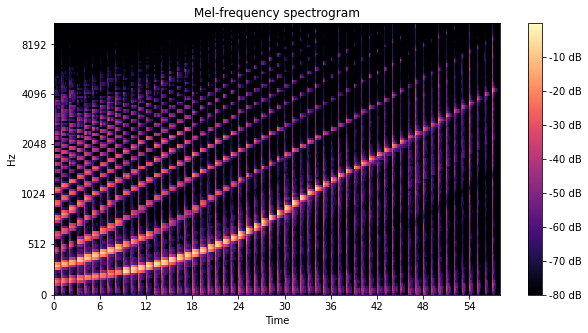

In [23]:
hop_length = 512
n_fft = 2048

S2 = librosa.feature.melspectrogram(y2, sr=sr, n_mels=128) 

plt.figure(figsize=(10, 5))
S2_dB = librosa.power_to_db(S2, ref=np.max)
img = librosa.display.specshow(S2_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')

# Note that the frequency scale below 500 Hz has a different slope 

